In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from datetime import datetime

es5m_df = pd.read_csv("C:\\Users\\Shuv\\Documents\\All Trading\\Market Data\\Research Data\\Chart_ES_12Oct21.csv")

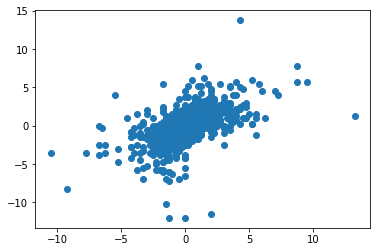

Correlation coeff of High vs Low nan
High Vol period: High diff: mean=-0.007 stdv=1.989 skew=nan Kurtosis=nan
High Vol period: Low Diff: mean=-0.007 stdv=2.136 skew=nan Kurtosis=nan
[[nan nan]
 [nan nan]]


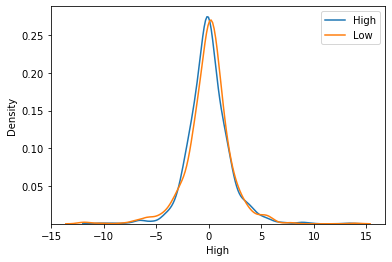

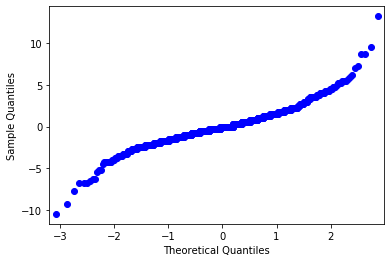

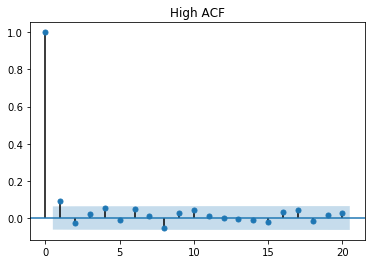

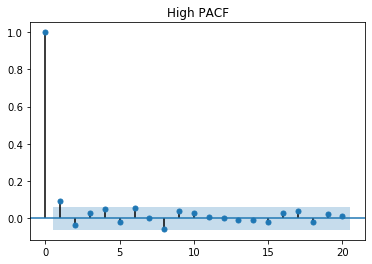

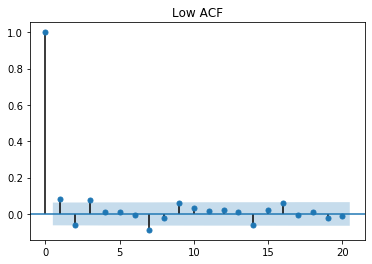

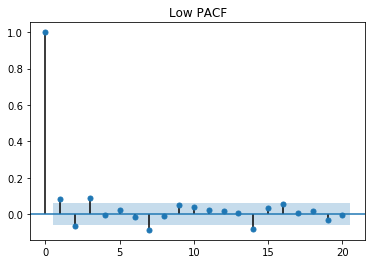

Statistics=nan, pHigh=1.0000
Statistics=nan, pLow=1.0000
High Sample looks Gaussian (fail to reject H0)
Low Sample looks Gaussian (fail to reject H0)
Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


In [82]:
#Plot the change in High,Low,Close and see how the distribution looks(for all times)
# Visually all looks Normal/Gaussian (This might be our prior Distribution)
#es5m_df

#Check visually if the High & Low change are correlated : In excel it returns a corr_coeff= 0.55 which is moderately correlated
data1 = es5m_df['High'].diff(); data2 = es5m_df['Low'].diff(); 
pyplot.scatter(data1, data2)
pyplot.show()

print('Correlation coeff of High vs Low %.4f' % (np.corrcoef(data1,data2))[0,1])
# print('High diff: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
# print('Low Diff: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

print('High Vol period: High diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data1), np.std(data1),skew(data1),kurtosis(data1)))
print('High Vol period: Low Diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data2), np.std(data2),skew(data2),kurtosis(data2)))


sns.kdeplot(es5m_df['High'].diff())
sns.kdeplot(es5m_df['Low'].diff())
#sns.kdeplot(es5m_df['Close'].diff())
plt.legend(labels = ['High','Low'])

print(np.cov(data1,data2))


qqplot(es5m_df['High'].diff(), line='s')
pyplot.show()

plot_acf(data1.dropna(),lags=20 , title='High ACF')
plot_pacf(data1.dropna(),lags=20, title = 'High PACF')

plot_acf(data2.dropna(),lags=20, title = 'Low ACF')
plot_pacf(data2.dropna(),lags=20, title = 'Low PACF')
plt.show()    

#Run Normality test
datahigh = es5m_df['High'].diff()
datalow = es5m_df['Low'].diff()
# Shapiro normality test
stath, p_high = shapiro(datahigh)
statl, p_low = shapiro(datalow)
print('Statistics=%.3f, pHigh=%.4f' % (stath , p_high))
print('Statistics=%.3f, pLow=%.4f' % (statl , p_low))


# interpret
alpha = 0.05
if p_high > alpha:
    print('High Sample looks Gaussian (fail to reject H0)')
else:
    print('High Sample does not look Gaussian (reject H0)')
    
if p_low > alpha:
    print('Low Sample looks Gaussian (fail to reject H0)')
else:
    print('Low Sample does not look Gaussian (reject H0)')    
    
# Another Normality test
stat, p = normaltest(datalow)
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

# The below code extracts the data from period of high volatility(US Open for ES & NQ),
and plots the distriubution
#FINDINGS: The change in (High,Low) seems Bi-modal in nature

Length of data1 & data2 132 132


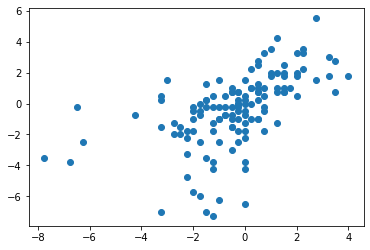

Correlation coeff of High vs Low 0.5497
High Vol period: High diff: mean=-0.392 stdv=1.938 skew=-0.833 Kurtosis=2.204
High Vol period: Low Diff: mean=-0.386 stdv=2.346 skew=-0.722 Kurtosis=0.914
Statistics=nan, pHigh=1.0000
Statistics=nan, pLow=1.0000
High Sample looks Gaussian (fail to reject H0)
Low Sample looks Gaussian (fail to reject H0)


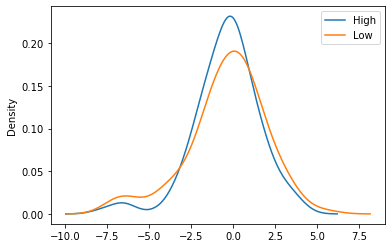

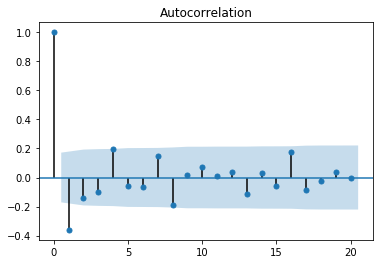

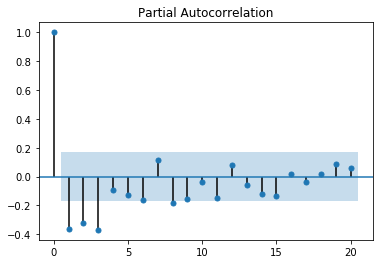

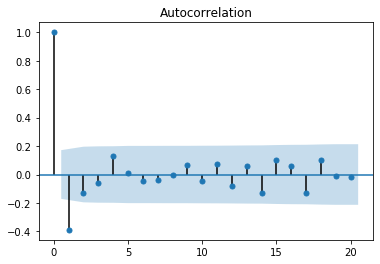

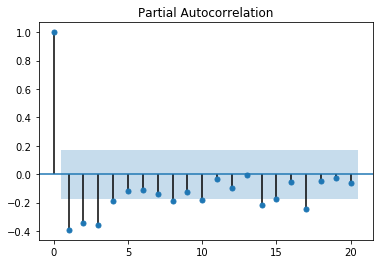

In [83]:

import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
#es5m_df.loc[es5m_df['Time'] > '10/12/2021 10:10']
new_es5m_df = es5m_df.copy()
voltimehigh = []; voltimelow = []
#Pick the High,Low prices in the 1st hour of US open i.e high volatility and liquidity,14:30 BST
#NOTE: We need to further consider the data from the SAME date only, as otherwise there'll be a jump between consecutive days
# Uncomment the for loop if you want to filter using traditional method
for i in range(len(new_es5m_df)-1):
    
    if (datetime.strptime(new_es5m_df.iloc[i]['Time'],'%m/%d/%Y %H:%M')).day == (datetime.strptime(new_es5m_df.iloc[i+1]['Time'],'%m/%d/%Y %H:%M')).day:
        rules = [datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('14:20','%H:%M'), 
            datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') < datetime.strptime('18:05','%H:%M')
            ]
        if all(rules):
            #print(new_es5m_df.iloc[i]['Time'])
            voltimehigh.append(new_es5m_df.iloc[i+1]['High'] - new_es5m_df.iloc[i]['High'])
            voltimelow.append(new_es5m_df.iloc[i+1]['Low'] - new_es5m_df.iloc[i]['Low'])

# USE of MAP & (Nested)FILTER !!        
def mystrptime(x):
   return datetime.strptime(x[x.find(":")-2:],'%H:%M')

#x1 = map(mystrptime, new_es5m_df['Time'])
#print(list(x1))
#x = datetime.strptime(new_es5m_df['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M')
#y = filter(lambda x2: x2 < datetime.strptime('15:30','%H:%M'),filter(lambda x: (x > datetime.strptime('14:30','%H:%M')), x1))

#voltimehigh = filter(lambda s: s['Time']==map(mystrptime, y),new_es5m_df)
#print(list(voltimehigh))
        
#Plot the high volatile data
#High Low plot shows somehow Bi-Modal distribution(if we consider 1st hour of US opening)

data1 = voltimehigh; data2= voltimelow
#data1= pd.Series(voltimehigh).diff()
#data2= pd.Series(voltimelow).diff()
print('Length of data1 & data2 %i %i'% (len(data1),len(data2)))


pyplot.scatter(data1, data2)
pyplot.show()
print('Correlation coeff of High vs Low %.4f' % (np.corrcoef(data1,data2))[0,1])

sns.kdeplot(data1)
sns.kdeplot(data2)
plt.legend(labels = ['High','Low'])

#qqplot(data1, line='s')
#qqplot(data2, line='s')
#pyplot.show()

# Print the Mean, SD, Skewness & Kurtosis
print('High Vol period: High diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data1), np.std(data1),skew(data1),kurtosis(data1)))
print('High Vol period: Low Diff: mean=%.3f stdv=%.3f skew=%.3f Kurtosis=%.3f' % (np.mean(data2), np.std(data2),skew(data2),kurtosis(data2)))



#Now Test Normality
stath, p_high = shapiro(pd.Series(voltimehigh).diff())
statl, p_low = shapiro(pd.Series(voltimehigh).diff())
print('Statistics=%.3f, pHigh=%.4f' % (stath , p_high))
print('Statistics=%.3f, pLow=%.4f' % (statl , p_low))
# interpret
alpha = 0.05
if p_high > alpha:
    print('High Sample looks Gaussian (fail to reject H0)')
else:
    print('High Sample does not look Gaussian (reject H0)')
    
if p_low > alpha:
    print('Low Sample looks Gaussian (fail to reject H0)')
else:
    print('Low Sample does not look Gaussian (reject H0)')     
    
plot_acf(pd.Series(voltimehigh).diff().dropna(),lags=20)
plot_pacf(pd.Series(voltimehigh).diff().dropna(),lags=20)

plot_acf(pd.Series(voltimelow).diff().dropna(),lags=20)
plot_pacf(pd.Series(voltimelow).diff().dropna(),lags=20)

plt.show()    

In [74]:
mytime = []
high = []
print(len(new_es5m_df['High'].diff()))
for i in range(len(new_es5m_df)-1):
    if (datetime.strptime(new_es5m_df.iloc[i]['Time'],'%m/%d/%Y %H:%M')).day == (datetime.strptime(new_es5m_df.iloc[i+1]['Time'],'%m/%d/%Y %H:%M')).day:
        mytime.append(new_es5m_df.iloc[i]['Time']) 
        high.append(new_es5m_df.iloc[i]['High'])
    
len(high)


981


975

In [135]:
# Test of stionarity
import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
result = adfuller(pd.Series(voltimehigh).diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.898082
p-value: 0.002049
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [108]:
#Utility to compare extract & compare time, for purpose of extracting data in high volatile period
# re.search is not needed
import re
f=re.search("/",new_es5m_df.iloc[1]['Time'])
datetime.strptime(new_es5m_df.iloc[1]['Time'][new_es5m_df.iloc[1]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('23:05','%H:%M')

False

# AWESOME USE of MAP & NESTED FILTER !!

In [3]:
new_es5m_df = es5m_df.copy()
#Try filter and Map function
# for i in range(len(new_es5m_df)):
#     rules = [datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('14:20','%H:%M'),
#             datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') < datetime.strptime('21:05','%H:%M')]
#     if all(rules):
#         voltimehigh.append(new_es5m_df.iloc[i]['High'])
#         voltimelow.append(new_es5m_df.iloc[i]['Low'])
#Now try the above logic with filter function
def unfilter(x):
   x1 =  datetime.strftime(x,'%d %m %Y %H:%M')
   return x1[x1.find(":")-2:]

def mystrptime(x):
   return datetime.strptime(x[x.find(":")-2:],'%H:%M')

x1 = map(mystrptime, new_es5m_df['Time'])
#print(list(x1))
#x = datetime.strptime(new_es5m_df['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M')
y = filter(lambda x2: x2 < datetime.strptime('15:30','%H:%M'),filter(lambda x: (x > datetime.strptime('14:30','%H:%M')), x1))
y1 = map(unfilter, y)
print (list(y1))
y2 = filter(lambda rec: datetime.strptime(rec['Time'],'%H:%M')==y1,new_es5m_df)
print(list(y2))

['14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25', '14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25', '14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25']


TypeError: string indices must be integers

In [61]:
x= 'hhhghg'
x[x.find('g'):]

'ghg'

In [44]:
type(new_es5m_df.iloc[1]['Time'])
datetime.datetime(1900, 1, 1, 14, 35) 

str

981